# Лабораторная работа 6. Интегралы и ОДУ.

Загрузим необходимые для работы библиотеки: 

In [1]:
import numpy as np
import math
import scipy
from sympy import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from matplotlib.patches import Polygon
init_printing()

from scipy.integrate import ode
from sympy.plotting import plot3d_parametric_line

# 1. Интегралы.

Определённый интеграл $\int_a^b f(x)\mathrm{d}x$ численно равен площади фигуры, ограниченной осью абсцисс, прямыми $x=a$ и $x=b$ и графиком функции $f(x)$.

<IPython.core.display.Javascript object>


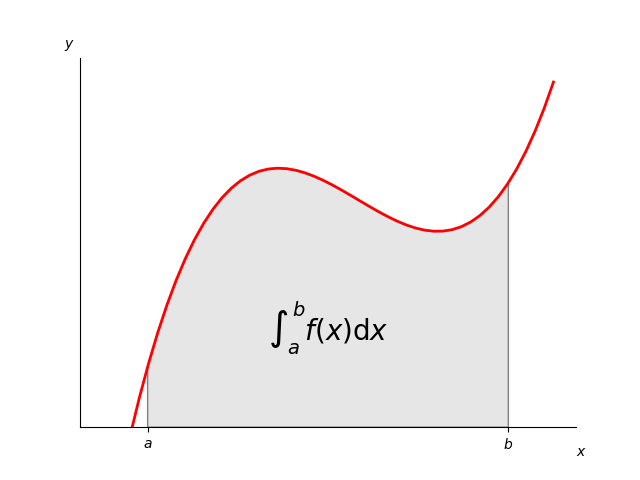

In [2]:
def func(x):
    return (x - 3) * (x - 5) * (x - 9) + 85

a, b = 1, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth = 2)
plt.ylim(ymin = 0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)

#ix2 = ix[::-1]
#iy2 = func2(ix2)

verts = [(a, 0), *zip(ix, iy), (b, 0)]
#verts = [*zip(ix, iy), *zip(ix2, iy2)]

poly = Polygon(verts, facecolor = '0.9', edgecolor = '0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment = 'center', fontsize = 20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

# Символьное ("аналитическое") нахождение интеграла.
# 1.1 Неопределённый интеграл.

Введём символьную переменную:

In [3]:
x = symbols('x')

Вычислим несколько интегралов $\int f(x)\mathrm{d}x$:

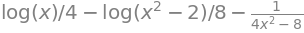

In [4]:
integrate(1 / (x * (x ** 2 - 2) ** 2), x)

In [5]:
integrate(1 / (exp(x) + 1), x)

In [6]:
integrate(log(x), x)

In [8]:
integrate(x * sin(x), x)

In [7]:
integrate(x * exp(-x ** 2), x)

Теперь присвоем значение неопределённого интеграла некоторой переменной:

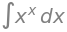

In [9]:
a = integrate(x ** x, x)
a

Получился невычисленный интеграл.

In [10]:
print(a)

Integral(x**x, x)


Чтобы вычислить его значение, воспользуемся методом (функцией), предусмотренной для символьного объекта (выражения):

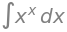

In [11]:
a.doit()

Кроме того, мы можем написать это в виде соответствующего уравнения:

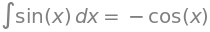

In [12]:
a = Integral(sin(x), x)
Eq(a, a.doit())

# Упражнение 1.

Вычислите следующие неопределённые интегралы. Результат запишите в виде соответствующих уравнений.


$$\int \frac{1}{1+cos(x)}\mathrm{d}x, \quad
\int x^2ln(x)\mathrm{d}x, \quad
\int \frac{sin(x)}{x}\mathrm{d}x$$

*Примечание: последнее выражение — это интегросинус, неберущийся интеграл.*

In [13]:
integrate(1 / (1 + cos(x)), x)

In [14]:
integrate(x ** 2 * ln(x), x)

In [15]:
integrate(sin(x) / x, x)

# 1.2 Определённый интеграл

Найдём значение определённого интеграла $\int_0^{\pi} sin(x)\mathrm{d}x$:

In [16]:
integrate(sin(x), (x, 0, pi))

Найдём значение несобственного интеграла $\int_0^{\infty} e^{-x^2}\mathrm{d}x$

In [17]:
a = integrate(exp(-x ** 2), (x, 0, oo))
a

Эти выражения являются вычисленными в символьной форме:

In [18]:
type(a)

sympy.core.mul.Mul

Вычислим это значение как число с помощью соответствующего метода:

In [19]:
a.n()

# Упражнение 1.

Вычислите следующие определённые интегралы (символьно и численно):

$$\int_0^{2\pi} \frac{1}{1+cos(x)}\mathrm{d}x, \quad
\int_0^{2\pi} \frac{1}{1-cos(x)}\mathrm{d}x, \quad
\int_0^1 x^2ln(x)\mathrm{d}x, \quad
\int_0^{\infty} \frac{sin(x)}{x}\mathrm{d}x$$

(последнее выражение — это интегросинус, неберущийся интеграл).

In [20]:
integrate(1 / (1 + cos(x)), (x, 0, 2 * pi))

In [21]:
integrate(1 / (1 - cos(x)), (x, 0, 2 * pi))

In [22]:
integrate(x ** 2 * ln(x), (x, 0, 1))

In [23]:
integrate(x ** 2 * ln(x), (x, 0, 1)).n()

In [24]:
integrate(sin(x) / x, (x, 0, oo))

In [25]:
integrate(sin(x) / x, (x, 0, oo)).n()

# 1.3 Численное нахождение определённого интеграла

# Формула прямоугольников

[Википедия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2)

In [26]:
def rectangular(f, a, b, n):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы прямоугольников
    f - подынтегральная функция
    a, b - пределы интегрирования
    n - количество частичных отрезков
    """
    h = float(b - a) / n
    result = f(a + .5 * h)
    for i in range(1, n):
        result += f(a + .5 * h + i * h)
    result *= h
    return result

# Формула трапеции

[Википедия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%82%D1%80%D0%B0%D0%BF%D0%B5%D1%86%D0%B8%D0%B9)

In [27]:
def trapezoidal(f, a, b, n):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций
    f - подынтегральная функция
    a, b - пределы интегрирования
    n - количество частичных отрезков
    """
    h = float(b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    result *= h
    return result

# Пример.

Вычислим приближенное значение интеграла $\int_0^1 3x^2e^{x^3}\mathrm{d}x$ с помощью формулы трапеций:

In [28]:
v = lambda x: 3 * x ** 2 * exp(x ** 3)
n = 4
I = trapezoidal(v, 0, 1, n)
I.n()

Давайте вычислим точное значение этого интеграла:

In [29]:
V = lambda x: exp(x ** 3)
exact = V(1) - V(0)
exact.n()

Найдём разность этих выражений (погрешность):

In [30]:
(exact - I).n()

Чтобы улучшить точность, можно увеличить количество частичных отрезков:

In [31]:
I = trapezoidal(v, 0, 1, n = 500)
(exact - I).n()

Сравнение формул трапеций и прямоугольников:

In [32]:
g = lambda x: exp(-x ** 2)
a = 0
b = 2
print('%7s %22s %22s %22s' % ('n', 'прямоугольники', 'трапеции', 'разница'))
for i in range(1, 12):
    n = 2 ** iпрямоугольники      |
    r = rectangular(g, a, b, n)прямоугольники      |
    t = trapezoidal(g, a, b, n)
    print('%7d %22.16f %22.16f %22.16f' % (n, r, t, abs(r - t)))

      n         прямоугольники               трапеции                разница
      2     0.8842000076332692     0.8770372606158094     0.0071627470174598
      4     0.8827889485397279     0.8806186341245393     0.0021703144151886
      8     0.8822686991994210     0.8817037913321336     0.0005649078672874
     16     0.8821288703366458     0.8819862452657770     0.0001426250708688
     32     0.8820933014203766     0.8820575578012113     0.0000357436191652
     64     0.8820843709743319     0.8820754296107942     0.0000089413635377
    128     0.8820821359746071     0.8820799002925637     0.0000022356820434
    256     0.8820815770754197     0.8820810181335849     0.0000005589418348
    512     0.8820814373412922     0.8820812976045025     0.0000001397367897
   1024     0.8820814024071774     0.8820813674728967     0.0000000349342806
   2048     0.8820813936736116     0.8820813849400391     0.0000000087335725


# 1.4. Двойной интеграл

Рассмотрим вопросы численного нахождения двойного интеграла по прямоугольной области $[a,b] \times [c, d]$:
$$\int_a^b \int_c^d f(x, y) dydx.$$
Удобно представить двойной интеграл через два интеграла, каждый из которых будет вычисляться от функции одной переменной и может быть найден с помощью уже известных нам методов. С этой целью введем вспомогательную функцию `g(x)`:
$$\int_a^b\int_{c}^d f(x, y) dydx = \int_a^b g(x) dx, \quad g(x) = \int_c^d f(x, y) dy.$$
Таким образом, имеем два интеграла:
$$\int_a^b g(x) dx, \quad  \int_c^d f(x, y) dy.$$

Для нахождения каждого из них можно использовать формулу прямоугольников; объединяя формулы по каждому направлению, получим составную формулу прямоугольников для двойного интеграла:
$$\int_a^b f(x, y) dydx \approx \sum_{i=0}^{N_x - 1} h_x \sum_{i =
0}^{N_y - 1} h_y f(x_i, y_i)$$

In [33]:
def rectangular_double(f, a, b, c, d, nx, ny):
    """
    Вычисляет значение двойного интеграла по формуле прямоугольников
    при реализации двойной суммы
    f - подынтегральная функция
    a, b, c, d - границы прямоугольной области интегрирования
    nx, ny - количество частичных отрезков по x и y соответственно
    """
    hx = (b - a) / float(nx)
    hy = (d - c) / float(ny)
    I = 0
    for i in range(nx):
        for j in range(ny):
            xi = a + hx / 2 + i * hx
            yj = c + hy / 2 + j * hy
            I += hx * hy * f(xi, yj)
    return I

# Пример. 

Вычислим интеграл: $\int_2^3\int_0^2 (2x + y) dxdy.$

Введём соответствующие переменные и рассмотрим символьное выражение: 

In [34]:
x, y = symbols("x y")
F = 2 * x + y

In [35]:
integrate(F, (y, 2, 3), (x, 0, 2))

Сравним это значение с результатом работы нашей программы rectangular_double()

In [36]:
f = lambda x, y: 2 * x + y

In [37]:
rectangular_double(f, 0, 2, 2, 3, 5, 5)

# 2. Обыкновенные дифференциальные уравнения. 

# 2.1. Задача Коши

# Программа интегрирования явным методом Эйлера.

[Википедия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0)

In [38]:
def solveOdeEL(n, fun, x0, xk, y0, N, par):
    y = np.zeros((n + 1, N))
    h = (xk - x0) / N
    i = 0 
    y[0, 0] = x0
    y[1 : n + 1, 0] = y0[0 : n]
    x = x0
    for i in range(1, N):
        f = fun(x, y[1 : n + 1, i - 1], par)
        x = x + h
        y[0,i] = x
        y[1 : n + 1, i] = y[1 : n + 1, i - 1] + h * f[0 : n]
    return y

# Программа интегрирования явным методом Рунге-Кутты 2-го порядка.

[Википедия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B)

In [39]:
def solveOdeRK2(n, fun, x0, xk, y0, N, par):
    y = np.zeros((n + 1,N))
    h = (xk - x0) / N
    i = 0 
    y[0, 0] = x0
    y[1 : n + 1, 0] = y0[0 : n]
    x = x0
    for i in range(1, N):
        k1 = fun(x, y[1 : n + 1, i - 1], par)
        k1 = y[1 : n + 1, i - 1] + .5 * h * k1[0 : n]
        k2 = fun(x + .5 * h, k1, par)
        x = x + h
        y[0, i] = x
        y[1 : n + 1, i] = y[1 : n + 1, i - 1] + h * k2[0 : n]
    return y

# Пример. Моделирование Солнечной системы.

Система дифференциальных уравнений задачи 2-х тел:

In [40]:
def fgrav(x,y,par):
    # x - независимая переменная
    # y - зависимые переменные
    # par - вектор параметров
    f  = np.zeros(6)
    x2 = y[0] * y[0]
    y2 = y[1] * y[1]
    z2 = y[2] * y[2]
    r2 = x2 + y2 + z2
    r = sqrt(r2)
    r1 = 1 / r
    r3 = r1 / r2
    f[0] = y[3]
    f[1] = y[4]
    f[2] = y[5]
    f[3] = -y[0] * r3
    f[4] = -y[1] * r3
    f[5] = -y[2] * r3
    return f

Система измерений и исходные данные:

In [41]:
AU     = 1.49597870691e8;  # km

fM_Sun = 1.32712440018e11; # km^3/sec^2
fM_Mer = fM_Sun/6023600.0  # km^3/sec^2
fM_Ven = fM_Sun/408523.71  # km^3/sec^2
fM_EarMoon = fM_Sun/328900.5614  # km^3/sec^2
fM_Mar = fM_Sun/3098708.0  # km^3/sec^2

UnitR = AU;                  # km
UnitV = sqrt(fM_Sun/UnitR);  # km/sec
UnitT = (UnitR/UnitV)/86400; # day  
UnitFM = fM_Sun              # km^3/sec^2

yMer0=[-0.265246099336,
       -0.372561652038,
       -0.006111474758,
         1.00151903154,
       -0.871649718664,
       -0.163100429107]
       
yVen0=[-0.457814494522,
       0.552649318236,
       0.034002196044,
       -0.909584432109,
       -0.756408993944,
       0.042110250459]

yEar0=[-0.995279234017,
       0.024767023716,
       0.000002625164,
       -0.041536979382,
       -1.003776365969,
       0.000079015845]

yMar0=[-0.421266708585,
       -1.431434652673,
       -0.019658244386,
       0.811109469152,
       -0.159765698913,
       -0.023247809147]

par = [4, fM_Mer/UnitFM, fM_Ven/UnitFM, fM_EarMoon/UnitFM, fM_Mar/UnitFM]

dt = 1*365.25 # day
N = 400

Интегрирование орбит планет разными методами:

In [42]:
MerEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yMer0,N,par)
VenEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yVen0,N,par)
EarEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yEar0,N,par)
MarEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yMar0,N,par)

MerRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yMer0,N,par)
VenRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yVen0,N,par)
EarRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yEar0,N,par)
MarRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yMar0,N,par)

Вспомогательная "обёртка" над библиотекой численного интегрирования:

In [43]:
ts1 = [] 
ys1 = []

def fout1(t, y):
    ts1.append(t)
    ys1.append(list(y.copy()))
    
def ODE (t0, tk, Y0, fun, par):
    ts1.clear()
    ys1.clear()
    r = scipy.integrate.ode(fun).set_integrator('dop853', rtol = 0, atol = 1.e-12, 
                                                nsteps = 1000)
    r.set_solout(fout1)
    r.set_initial_value(Y0, t0).set_f_params(par)
    y1 = r.integrate(tk)
    Y1 = np.array(ys1)
    return ts1, Y1

Интегрирование орбит планет с помоцью библиотеки `ode`:

In [44]:
tMer, MerODE = ODE(0, dt/UnitT, yMer0, fgrav, par)
tVen, VenODE = ODE(0, dt/UnitT, yVen0, fgrav, par)
tEar, EarODE = ODE(0, dt/UnitT, yEar0, fgrav, par)
tMar, MarODE = ODE(0, dt/UnitT, yMar0, fgrav, par)

Результаты интегрирования, полученные с помощью метода Эйлера:

<IPython.core.display.Javascript object>


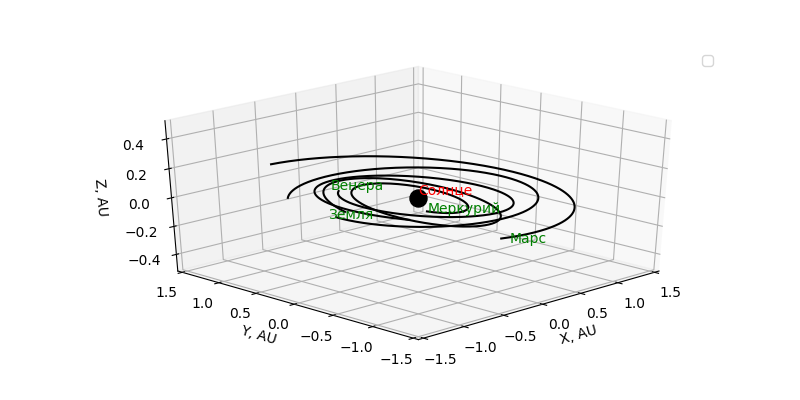

No handles with labels found to put in legend.


In [45]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerEl[1,:],MerEl[2,:],MerEl[3,:], color='k')
ax.plot(VenEl[1,:],VenEl[2,:],VenEl[3,:], color='k')
ax.plot(EarEl[1,:],EarEl[2,:],EarEl[3,:], color='k')
ax.plot(MarEl[1,:],MarEl[2,:],MarEl[3,:], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

Результаты интегрирования, полученные с помощью метода Рунге-Кутты 2-го порядка:

<IPython.core.display.Javascript object>


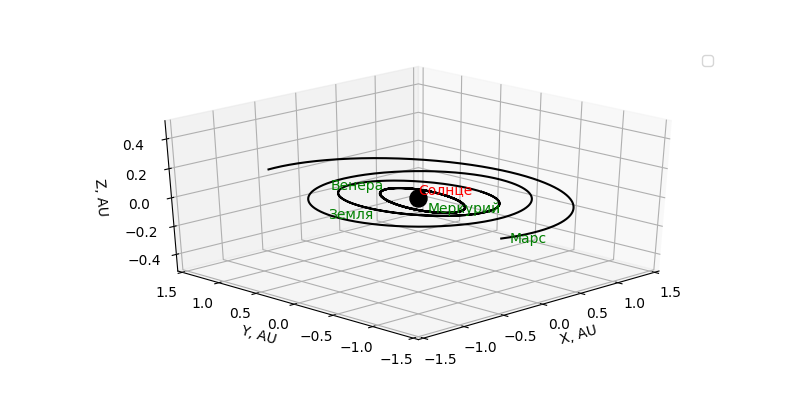

No handles with labels found to put in legend.


In [46]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerRK2[1,:],MerRK2[2,:],MerRK2[3,:], color='k')
ax.plot(VenRK2[1,:],VenRK2[2,:],VenRK2[3,:], color='k')
ax.plot(EarRK2[1,:],EarRK2[2,:],EarRK2[3,:], color='k')
ax.plot(MarRK2[1,:],MarRK2[2,:],MarRK2[3,:], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

<IPython.core.display.Javascript object>


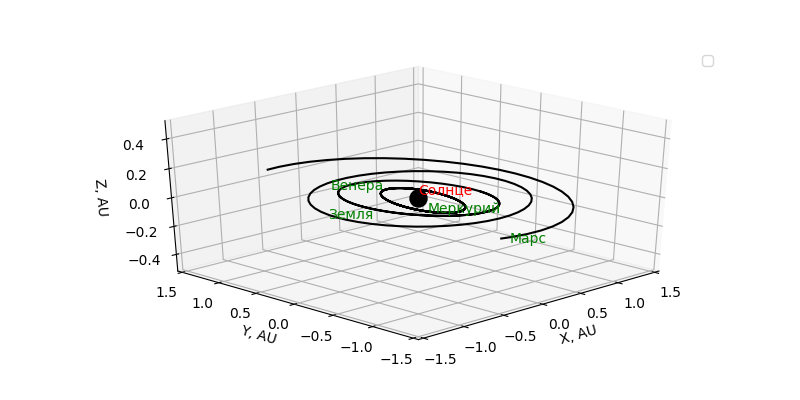

No handles with labels found to put in legend.


In [47]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerODE[:,0],MerODE[:,1],MerODE[:,2], color='k')
ax.plot(VenODE[:,0],VenODE[:,1],VenODE[:,2], color='k')
ax.plot(EarODE[:,0],EarODE[:,1],EarODE[:,2], color='k')
ax.plot(MarODE[:,0],MarODE[:,1],MarODE[:,2], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

# Домашнее задание (базовое):

# Задание 1.

Напишите программу, реализующую [Метод Симпсона](https://ru.wikipedia.org/wiki/Формула_Симпсона) (формулу Симпсона) для нахождения определённого интеграла.

In [48]:
def sympson(f, a, b):
    return (b - a) / 6 * (f(a) + 4 * f(a / 2 + b / 2) + f(b))

In [49]:
x = symbols('x')
v = lambda x: 3 * x ** 2 * exp(x ** 3)
I = sympson(v, 0, 1)
I.n()

# Задание 2.

Вычислить площадь плоской фигуры, ограниченной графиками функций:

$$ f(x) = x^2 + 1, g(x) = 2x+4 $$

<IPython.core.display.Javascript object>


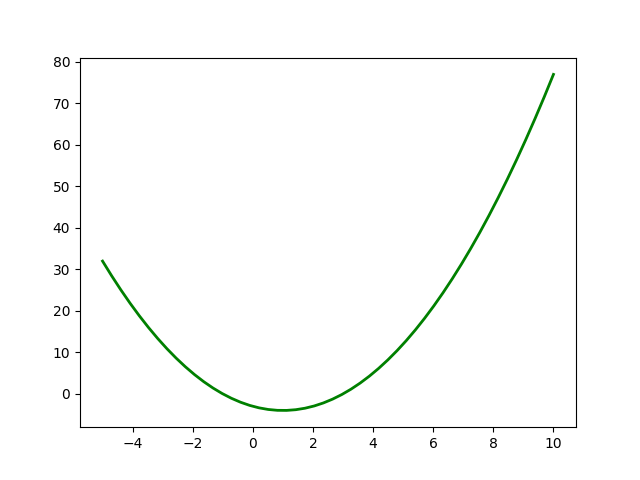

In [50]:
f = lambda x: x ** 2 + 1
g = lambda x: 2 * x + 4
x = np.linspace(-5, 10)
#y = f(x)
#y2 = g(x)
y3 = f(x) - g(x)

fig, ax = plt.subplots()
#plt.plot(x, y, 'r', linewidth=2)
#plt.plot(x, y2, 'b', linewidth=2)
plt.plot(x, y3, 'g', linewidth=2)

In [51]:
x = symbols('x')
roots(x ** 2 + 1 - (2 * x + 4), x)

In [52]:
print(sympson(g, -1, 3) - sympson(f, -1, 3))

10.666666666666668


Статус: `задание решено не до конца`.

# Комментарий к заданию 2.

Площадь фигуры, заключённой между двумя функциями $f(x)$, $g(x)$, на отрезке $[a,b]$ можно представить как двойной интеграл с переменными пределами интегрирования:

$$\int_a^b \int_{g(x)}^{f(x)} dydx.$$

Проилюстрируем это графиком (см. ниже).

Попробуйте решить это задание двумя способами: с помощью разности интегралов и через двойной интеграл. Попробуйте также адаптировать для вычисления такого двойного интеграла функцию `rectangular_double()`.

<IPython.core.display.Javascript object>


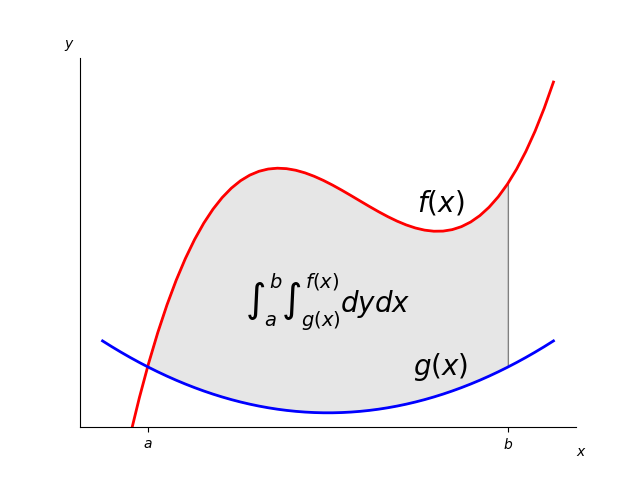

In [53]:
def func2(x):
    return (x - 5)**2+5

a, b = 1, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)
y2 = func2(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.plot(x, y2, 'b', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)

ix2 = ix[::-1]
iy2 = func2(ix2)

verts = [*zip(ix, iy), *zip(ix2, iy2)]

poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 40, r"$\int_a^b \int_{g(x)}^{f(x)} dydx$",
         horizontalalignment='center', fontsize=20)
plt.text(0.75 * (a + b), 75, r"$f(x)$",
         horizontalalignment='center', fontsize=20)
plt.text(0.75 * (a + b), 18, r"$g(x)$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

# Задание 3.

Сравните точность работы имеющихся программ на примере вычисления интеграла из 2-го задания. Решение оформите в виде таблицы:

```
n | прямоугольники | трапеции | Симпсон | точное
```

In [55]:
a = float(input('Введите a: '))
b = float(input('Введите b: '))
x = symbols('x')
fg = lambda x: x ** 2 - 2 * x - 3
for i in range(12):
    n = 2 ** i
    print("%4d | %.8f | %.8f | %.8f | %.8f" % (n,
                                              rectangular(fg, a, b, n),
                                              trapezoidal(fg, a, b, n),
                                              sympson(fg, a, b),
                                              integrate(x ** 2 - 2 * x - 3, (x, a, b))))

Введите a: 5
Введите b: 6
   1 | 16.25000000 | 16.50000000 | 16.33333333 | 16.33333333
   2 | 16.31250000 | 16.37500000 | 16.33333333 | 16.33333333
   4 | 16.32812500 | 16.34375000 | 16.33333333 | 16.33333333
   8 | 16.33203125 | 16.33593750 | 16.33333333 | 16.33333333
  16 | 16.33300781 | 16.33398438 | 16.33333333 | 16.33333333
  32 | 16.33325195 | 16.33349609 | 16.33333333 | 16.33333333
  64 | 16.33331299 | 16.33337402 | 16.33333333 | 16.33333333
 128 | 16.33332825 | 16.33334351 | 16.33333333 | 16.33333333
 256 | 16.33333206 | 16.33333588 | 16.33333333 | 16.33333333
 512 | 16.33333302 | 16.33333397 | 16.33333333 | 16.33333333
1024 | 16.33333325 | 16.33333349 | 16.33333333 | 16.33333333
2048 | 16.33333331 | 16.33333337 | 16.33333333 | 16.33333333


# Домашнее задание (дополнительное):

# Задание площадь и объём.

Найти объём и площадь поверхности фигур вращения заданных функциями

a) $$ f(x) = (x - 3)(x - 5)(x - 9) + 85 $$ при $ x \in [2;9] $

б) $$ f(x) = \frac{1}{x} $$ при $ x \in [0;\infty] $

# Комментарий к заданию.

Поскольку речь идёт о фигуре вращения, то очевидно, что у неё есть ось симметрии и относительно этой оси любое перпендткулярное сечение даст круг некотрого радиса. Сумма клощадей всех этих кругов и будет объёмом этой фигуры, а сумма длинн окружности - площадью боковой поверхности.

Тогда, если тело образовано вращением графиком функции $f(x)$ относительно оси $x$в (т.е. $f(x)$ - это радиус окружности получающейся в сечении проведённом в точке $x$), справидливы следующие выражения для объёма и площади боковой поверхности:

$$V = \pi \int_a^b f^2(x) dx,$$
$$S = 2\pi \int_a^b f(x) \sqrt{1 + f'(x)} dx.$$


Построим поверхность вращения из задания 3 (a):

<IPython.core.display.Javascript object>


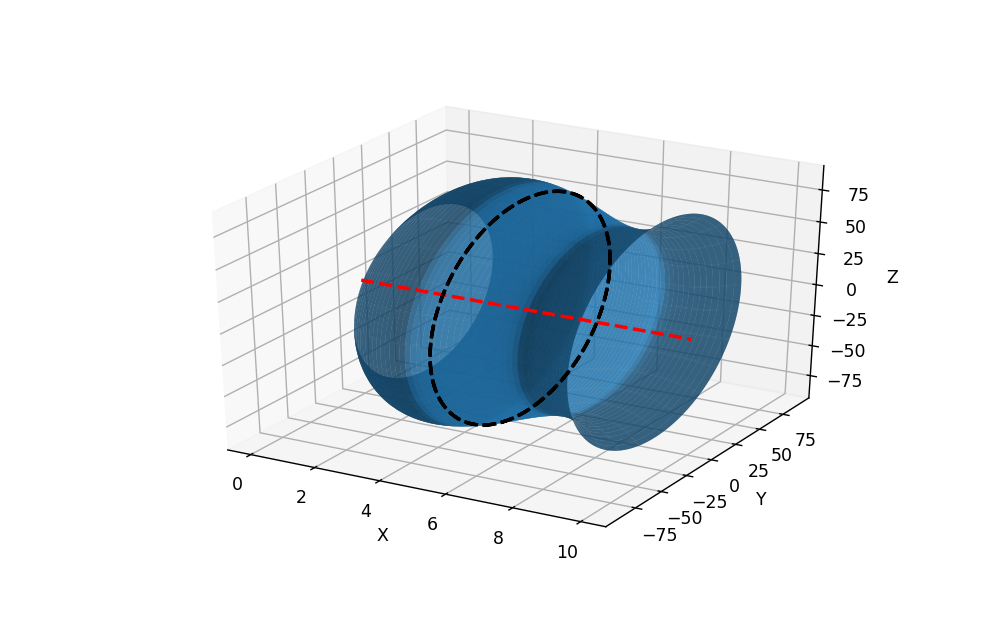

In [126]:
plt.figure(figsize=(8,5))  
ax = plt.gca(projection="3d")

theta = np.linspace(-2*np.pi,2*np.pi, 600) 
X = np.linspace(2,9,700) 

x=np.full((600), 5)
r = func(x[0])
y=(r*np.cos(theta))
z=(r*np.sin(theta))

X,theta = np.meshgrid(X, theta) 

R = func(X)
Y = (R*np.cos(theta)) 
Z = (R*np.sin(theta)) 

ax.plot([0,10],[0,0],[0,0], '--', color='r', linewidth=2)
ax.plot(x,y,z, '--', color='k', linewidth=2)

ax.plot_surface(X,Y,Z,linewidth = 0,facecolor = 'r', shade = True, alpha = 0.6) 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')#, rotation=90)
plt.show()

Построим поверхность вращения из задания 3 (b):

In [131]:
def fun2b(x):
    return 1.0/x

<IPython.core.display.Javascript object>


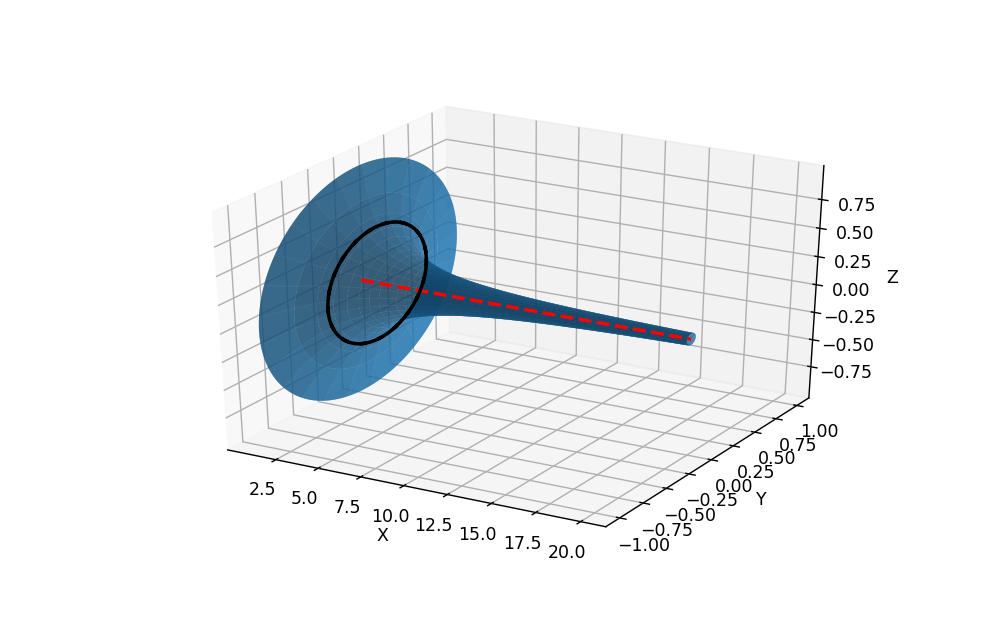

In [134]:
A=1
B=20

plt.figure(figsize=(8,5))  
ax = plt.gca(projection="3d")

theta = np.linspace(-2*np.pi,2*np.pi, 600) 
X = np.linspace(A,B,700) 

x=np.full((600), 2)
r = fun2b(x[0])
y=(r*np.cos(theta))
z=(r*np.sin(theta))

X,theta = np.meshgrid(X, theta) 

R = fun2b(X)
Y = (R*np.cos(theta)) 
Z = (R*np.sin(theta)) 

ax.plot([A,B],[0,0],[0,0], '--', color='r', linewidth=2)
ax.plot(x,y,z, '--', color='k', linewidth=2)

ax.plot_surface(X,Y,Z,linewidth = 0,facecolor = 'r', shade = True, alpha = 0.6) 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')#, rotation=90)
plt.show()

Статус: `задание не решено`.

# Задание. Численное решение ОДУ.

Напишите программу для интегрирования системы ОДУ:
- неявным методом Эйлера,
- явным методом Рунге-Кутты 4-го порядка.

Статус: `задание не решено`.

# Задание. Космическое путешествие.

Используя программу для решения з. Коши и один из решателей нелинейной системы уравнений из предыдущей лабы, решите краевую задачу: найдите скорость, которую должен иметь относительно Солнца космический корабль, отлетая от Земли, чтобы через 9 месяцев встретиться с Венерой. Используйте координаты планет, приведённые в этой лабораторной.

Статус: `задание не решено`.